In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
hs=pd.read_csv("C:\\Users\\HP\\Downloads\\PEP1.csv")

In [3]:
train, test=train_test_split(hs, test_size=0.5, shuffle=False)

In [4]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [5]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,730.000000,730.000000,730,606.000000,730.000000,730,48,730,730,730,...,730.00000,1,138,28,730.000000,730.000000,730.000000,730,730,730.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,1,4,3,NaN,NaN,NaN,8,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,562,NaN,NaN,727,27,457,653,730,...,NaN,1,83,26,NaN,NaN,NaN,628,596,NaN
mean,365.500000,57.246575,NaN,69.960396,10941.512329,NaN,NaN,NaN,NaN,NaN,...,0.70137,NaN,NaN,NaN,49.671233,6.349315,2007.806849,NaN,NaN,183129.673973
std,210.877136,43.400006,NaN,21.711065,12978.358026,NaN,NaN,NaN,NaN,NaN,...,18.94997,NaN,NaN,NaN,604.974487,2.746721,1.318730,NaN,NaN,81879.933105
min,1.000000,20.000000,NaN,21.000000,1491.000000,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,183.250000,20.000000,NaN,59.250000,7508.750000,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,128962.500000
50%,365.500000,50.000000,NaN,70.000000,9472.000000,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163745.000000
75%,547.750000,70.000000,NaN,80.000000,11645.000000,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,219000.000000


In [6]:
train.shape

(730, 81)

In [7]:
train.isnull().sum().sort_values(ascending= False).head(20)

PoolQC          729
MiscFeature     702
Alley           682
Fence           592
FireplaceQu     336
LotFrontage     124
GarageYrBlt      44
GarageFinish     44
GarageType       44
GarageQual       44
GarageCond       44
BsmtFinType2     18
BsmtExposure     17
BsmtQual         17
BsmtCond         17
BsmtFinType1     17
MasVnrType        3
MasVnrArea        3
Id                0
Functiol          0
dtype: int64

In [8]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)
test.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
730,731,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,236500
731,732,80,RL,9590,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,187500
732,733,60,RL,11404,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,222500
733,734,20,RL,10000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,400,3,2009,WD,Normal,131400
734,735,20,RL,8978,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2007,WD,Family,108000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


(730, 81)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

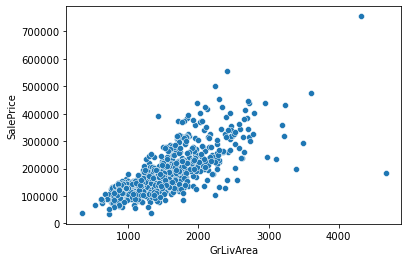

In [9]:
print(train.shape)
sns.scatterplot(y="SalePrice", x="GrLivArea", data=train)

In [10]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index, inplace=True)
print('Rows and columns after dropping outliers :' , train.shape )

Rows and columns after dropping outliers : (729, 81)


Text(0.5, 1.0, 'MSSubClass Count')

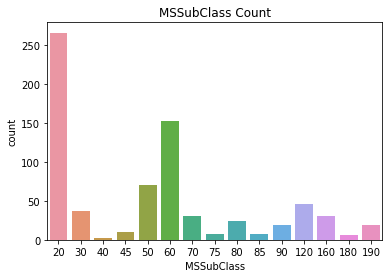

In [11]:
sns.countplot(x="MSSubClass",data=train)
plt.title('MSSubClass Count')

In [12]:
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
features=[]
obj_col=[]
for col in cols:
    if (train[col].dtype) == object :
        obj_col.append(col)
obj_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functiol',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
def plotting(col):
    sns.countplot(x=col,data=train)
    plt.title('CountPlot for '+ col)
    print('No. of missing values are : ')
    print(train[col].isnull().sum())

No. of missing values are : 
0


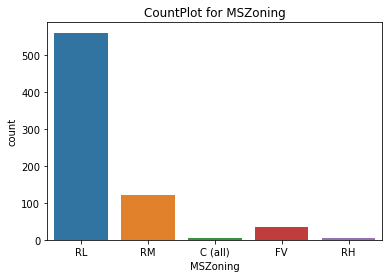

In [14]:
#Zoning Classification :  Identifies the general zoning classification of the sale.
plotting('MSZoning')
#It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

No. of missing values are : 
0


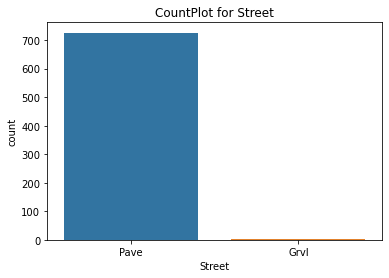

In [15]:
#Street : Type of road access to property
plotting('Street')
#It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

No. of missing values are : 
0


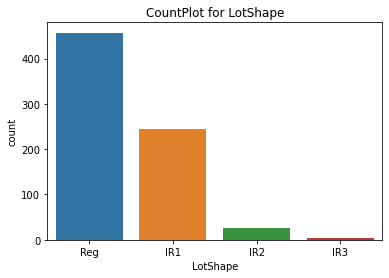

In [16]:
# Lot Shape : General shape of property
plotting('LotShape')
features.append('LotShape')
# It looks bit fine for considering this feature for final prediction.
# Mapping its values
train.LotShape=train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})
test.LotShape=test.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

No. of missing values are : 
0


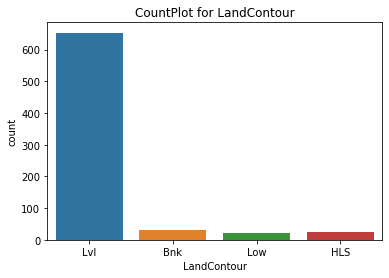

In [17]:
#LandContour: Flatness of the property
plotting('LandContour')
#It is biased towards only one category so it should be avoided

No. of missing values are : 
0


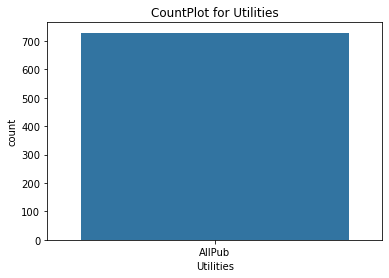

In [18]:
# Utilities: Type of utilities available
plotting('Utilities')
#Again a biased factor, so it should be avoided.

No. of missing values are : 
0


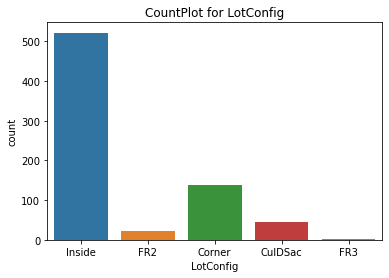

In [19]:
#LotConfig: Lot configuration
plotting('LotConfig')
# Well it looks okayish as CornerLotConfig will surely boost the price.
features.append('LotConfig')
#Mapping the values to make this column suitable for model.
train.LotConfig=train.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})
test.LotConfig=test.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})

No. of missing values are : 
0


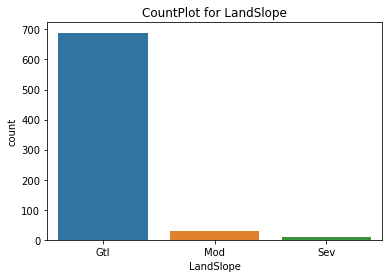

In [20]:
#LandSlope: Slope of property
plotting('LandSlope')
#This seems more biased towards Gentle Slope, so avoiding it.

                  SalePrice
Neighborhood               
Blmngtn       199467.750000
Blueste       151000.000000
BrDale        103211.111111
BrkSide       124405.468750
ClearCr       211760.705882
CollgCr       198692.083333
Crawfor       208953.083333
Edwards       127698.979592
Gilbert       188763.542857
IDOTRR        103524.000000
MeadowV        97988.888889
Mitchel       162380.285714
NPkVill       142400.000000
NWAmes        186780.645161
NoRidge       326407.894737
NridgHt       313823.979592
OldTown       131044.838710
SWISU         148483.400000
Sawyer        135258.575758
SawyerW       189327.620690
Somerst       233559.700000
StoneBr       321399.625000
Timber        248347.222222
Veenker       243916.666667
mes           147442.890909
No. of missing values are : 
0


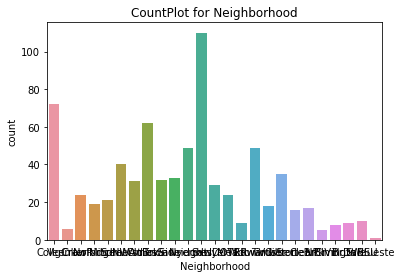

In [21]:
#Neighborhood: Physical locations within Ames city limits
train_neighbor=train.copy()
print(train_neighbor[['Neighborhood','SalePrice']].groupby(['Neighborhood'],as_index=True).mean())
plotting('Neighborhood')
#This looks promising as Price varies from area to area and it can be seen through the mean of the prices of selected Neighborhood.
features.append('Neighborhood')
train.Neighborhood=train.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
test.Neighborhood=test.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

No. of missing values are : 
0


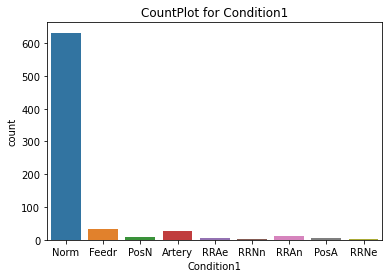

In [22]:
#Condition1: Proximity to various conditions
plotting('Condition1')
#This looks totally biased.    

No. of missing values are : 
0


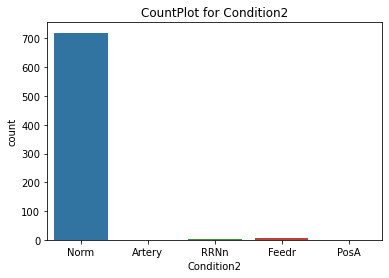

In [23]:
#Condition2: Proximity to various conditions (if more than one is present)
plotting('Condition2')
#Biased data.

No. of missing values are : 
0


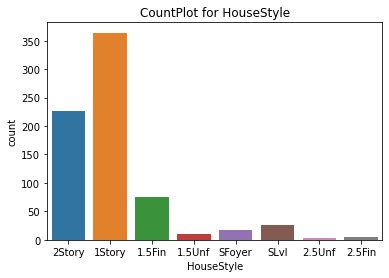

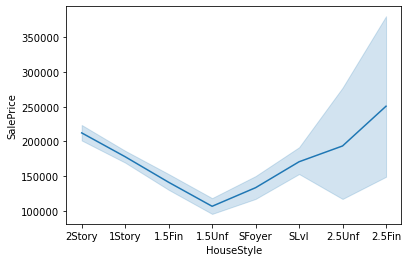

In [24]:
#HouseStyle: Style of dwelling
plotting('HouseStyle')
plt.show()
sns.lineplot(y='SalePrice',x='HouseStyle',data=train)
#Clearly it can be seen from the plots that HouseStyle has big effect on Saleprice.
features.append('HouseStyle')
#Mapping values 
train.HouseStyle=train.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
test.HouseStyle=test.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

No. of missing values are : 
0


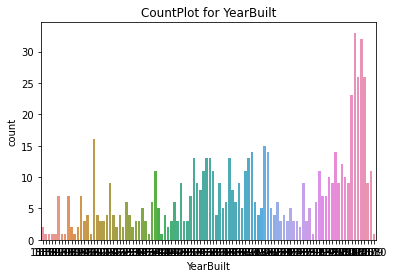

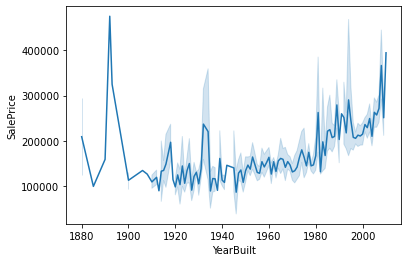

In [25]:
#YearBuilt: Original construction
plotting('YearBuilt')
plt.show()
sns.lineplot(y='SalePrice',x='YearBuilt',data=train)
# It is clearly visible. So it should be part of our features variable.
features.append('YearBuilt')

No. of missing values are : 
0


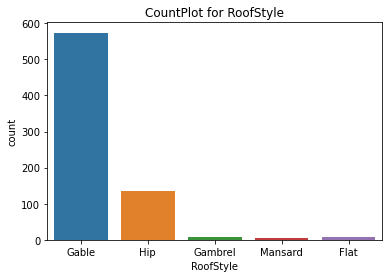

No. of missing values are : 
0


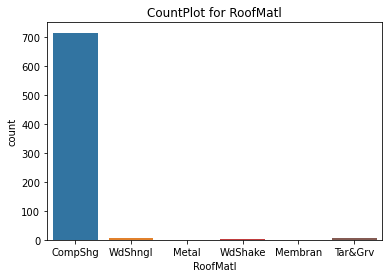

In [26]:
#Roof Style : Type of roof
plotting('RoofStyle')
plt.show()
#RoofMatl: Roof material
plotting('RoofMatl')
    
#Both are biased. 

No. of missing values are : 
0


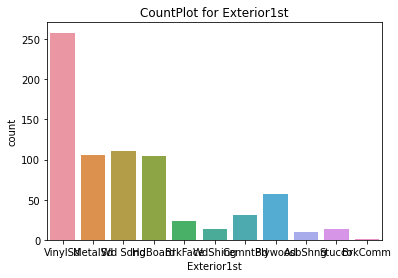

No. of missing values are : 
0


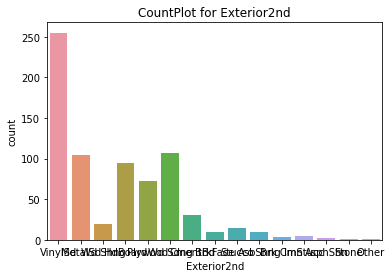

In [27]:
#Exteriors
#Exterior1st: Exterior covering on house
plotting('Exterior1st')
plt.show()
#Exterior2nd: Exterior covering on house (if more than one material)
plotting('Exterior2nd')
plt.show()

train.Exterior1st=train.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})

test.Exterior1st=test.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                            'Stone':7, 'ImStucc':7})

features.append('Exterior1st')

No. of missing values are : 
0


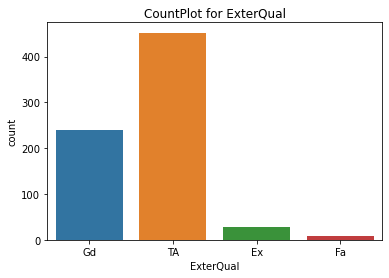

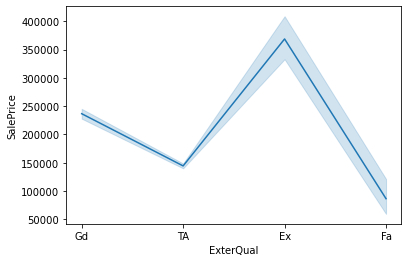

In [28]:
#feetExterQual: Evaluates the quality of the material on the exterior 

plotting('ExterQual')
plt.show()
sns.lineplot(y='SalePrice',x='ExterQual',data=train)
features.append('ExterQual')
train.ExterQual = train.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test.ExterQual = test.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

No. of missing values are : 
0


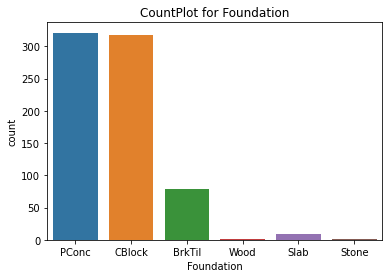

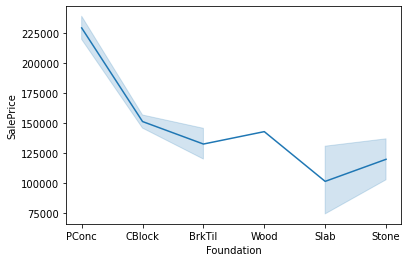

In [29]:
#Foundation: Type of foundation
plotting('Foundation')
plt.show()
sns.lineplot(y='SalePrice',x='Foundation',data=train)
train.Foundation=train.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
test.Foundation=test.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
features.append('Foundation')

No. of missing values are : 
17


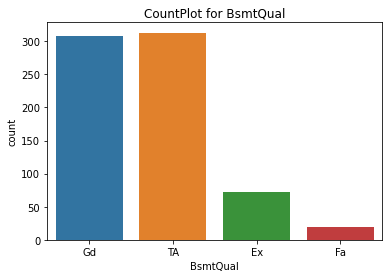

In [30]:
#BsmtQual: Evaluates the height of the basement
plotting('BsmtQual')
train.BsmtQual=train.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
test.BsmtQual=test.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
features.append('BsmtQual')

No. of missing values are : 
17


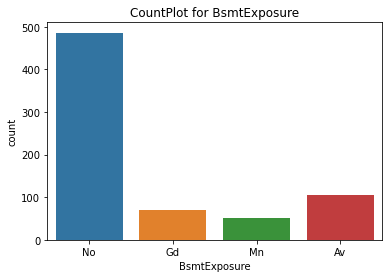

In [31]:
#BsmtExposure: Refers to walkout or garden level walls
plotting('BsmtExposure')
train.BsmtExposure=train.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
test.BsmtExposure=test.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4}) 
features.append('BsmtExposure')

No. of missing values are : 
0


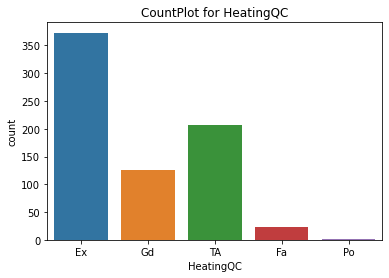

In [32]:
#HeatingQC :Heating quality and condition  
plotting('HeatingQC')
train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
test.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('HeatingQC')

No. of missing values are : 
0


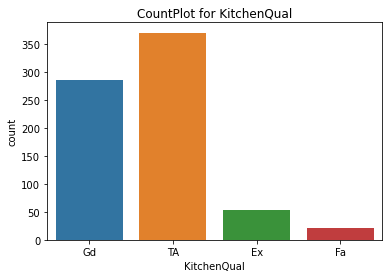

In [33]:
#KitchenQual: Kitchen quality
plotting('KitchenQual')
train.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
test.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
features.append('KitchenQual')

No. of missing values are : 
336


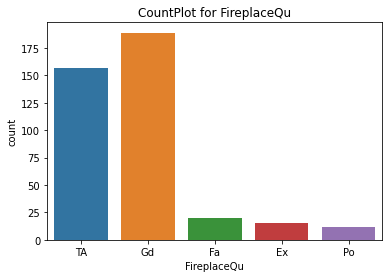

In [34]:
#FireplaceQu: Fireplace quality
plotting('FireplaceQu')
train.FireplaceQu.fillna('None',inplace=True)
train.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
test.FireplaceQu.fillna('None',inplace=True)
test.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('FireplaceQu')

No. of missing values are : 
44


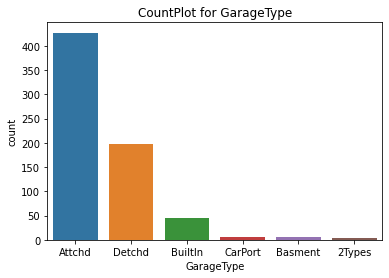

In [35]:
#GarageType: Garage location
plotting('GarageType')
train.GarageType.fillna('None',inplace=True)
test.GarageType.fillna('None',inplace=True)
train.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
test.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
features.append('GarageType')

No. of missing values are : 
44


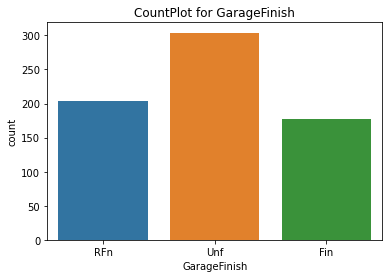

In [36]:
#GarageFinish: Interior finish of the garage
plotting('GarageFinish')
train.GarageFinish.fillna('None',inplace=True)
test.GarageFinish.fillna('None',inplace=True)
train.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
test.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
features.append('GarageFinish')

In [37]:
full=pd.concat([train,test],ignore_index=True)
full.drop('Id',axis=1,inplace=True)
full.shape

(1459, 80)

In [38]:
full.isnull().sum().sort_values(ascending=False)

PoolQC         1452
MiscFeature    1405
Alley          1368
Fence          1178
LotFrontage     259
               ... 
ExterCond         0
ExterQual         0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 80, dtype: int64

In [39]:
train.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
1              28.625000   21.0     8
2              52.000000   57.0    31
3              60.293233   60.0   133
4              64.166667   65.0    30
5              62.347826   69.0    23
6              78.307692   78.0    65
7              72.589474   70.0    95
8              71.566038   75.0    53
9              64.384615   66.0    13
10             84.461538   90.0    65
mes            77.988764   75.0    89

In [40]:
train['LotAreaCut'] = pd.qcut(train.LotArea,10)
train.groupby([train['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])
test['LotAreaCut'] = pd.qcut(test.LotArea,10)
test.groupby([test['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                          mean median count
LotAreaCut                                 
(1299.999, 5236.9]   36.459016   35.0    61
(5236.9, 7098.8]     56.676923   52.0    65
(7098.8, 8125.0]     64.384615   62.0    65
(8125.0, 8848.4]     67.575758   68.0    66
(8848.4, 9484.5]     69.603448   70.0    58
(9484.5, 10140.0]    74.328358   75.0    67
(10140.0, 11029.0]   73.634921   72.0    63
(11029.0, 12138.4]   83.055556   80.5    54
(12138.4, 14536.5]   86.078431   88.0    51
(14536.5, 63887.0]  103.333333   94.0    45

In [41]:
train['LotFrontage']= train.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
test['LotFrontage']= test.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [42]:
#These columns are having plenty of missing values , so it is good idea to fill them with 0.
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:
    train[col].fillna(0,inplace= True)
for col in columns:
    test[col].fillna(0,inplace=True)

In [43]:
columns1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
"GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col1 in columns1:
    train[col1].fillna('None',inplace = True)
    test[col1].fillna('None',inplace=True)

In [44]:
#These columns are having very few missing values , so I'm filling them with their mode.
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functiol",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]

for col2 in columns2:
    train[col2].fillna(full[col2].mode()[0],inplace = True)
    test[col2].fillna(full[col2].mode()[0],inplace = True)

In [45]:
train.drop("LotAreaCut",axis=1,inplace=True)
test.drop("LotAreaCut",axis=1,inplace=True)

In [46]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [47]:
cols_num = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchebvGr","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]

for i in cols_num :
    train[i]=train[i].astype(str)
    test[i]=test[i].astype(str)

In [48]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [49]:
train.isnull().sum(0).sort_values(ascending=False)

LotFrontage     3
Id              0
BedroomAbvGr    0
GarageYrBlt     0
GarageType      0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 81, dtype: int64

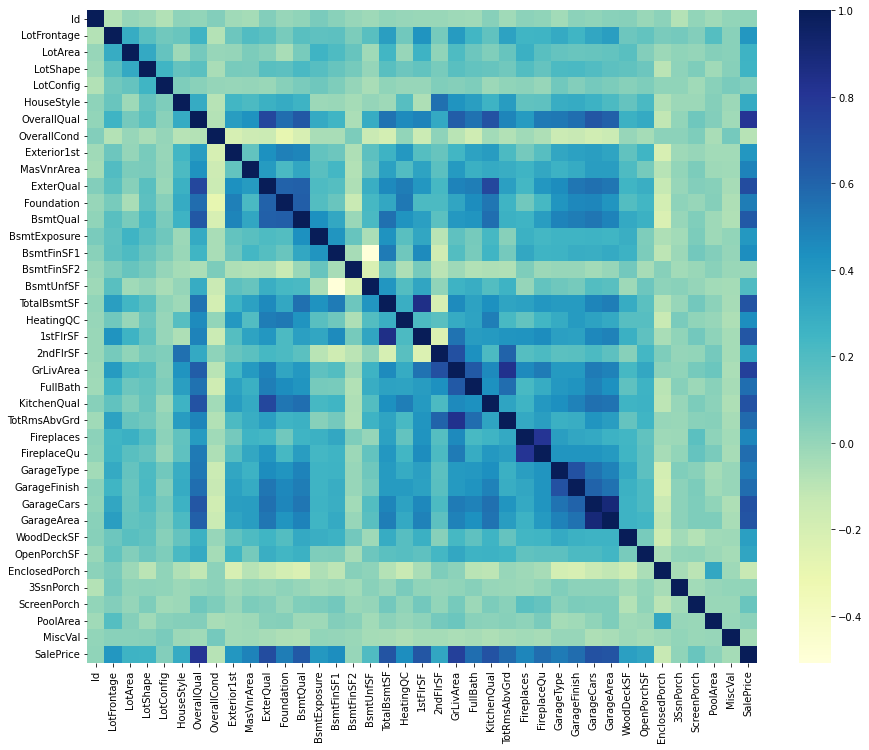

In [50]:
#Checking correlation via heatmap:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),cmap="YlGnBu")
plt.show()

In [51]:
core=train.corr()
core_des=core.sort_values(by='SalePrice',ascending=False)
core_des

,Id,LotFrontage,LotArea,LotShape,LotConfig,HouseStyle,OverallQual,OverallCond,Exterior1st,MasVnrArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
SalePrice,0.015624,0.399822,0.262191,0.253662,0.048917,0.302537,0.806375,-0.087906,0.400906,0.481850,...,0.677655,0.665108,0.358982,0.332817,-0.133826,0.010649,0.123533,0.023480,-0.037530,1.000000
OverallQual,0.006707,0.254792,0.091945,0.164359,0.032048,0.301644,1.000000,-0.084084,0.373071,0.423023,...,0.652772,0.612474,0.270909,0.307810,-0.115514,0.006670,0.105204,0.049575,-0.030578,0.806375
GrLivArea,-0.020708,0.386514,0.206431,0.169661,0.039380,0.420128,0.625015,-0.092472,0.240518,0.387110,...,0.516234,0.490630,0.230638,0.318439,0.026298,0.011393,0.086450,0.116091,-0.059756,0.758016
ExterQual,0.045898,0.163329,0.035083,0.172033,-0.012759,0.270853,0.723642,-0.151756,0.429482,0.382243,...,0.553887,0.530655,0.247101,0.283810,-0.128658,-0.006306,0.050321,0.038217,-0.046841,0.700177
GarageCars,0.009894,0.327821,0.132678,0.193959,0.090118,0.268898,0.652772,-0.174379,0.367905,0.371674,...,1.000000,0.897997,0.260631,0.211849,-0.143478,0.024568,0.061716,0.012123,-0.063855,0.677655
KitchenQual,0.036099,0.148217,0.052353,0.130820,-0.019477,0.260474,0.671618,-0.034916,0.376048,0.307014,...,0.552756,0.543694,0.253039,0.266742,-0.106426,-0.004834,0.063333,0.027119,-0.061160,0.675231
TotalBsmtSF,0.007243,0.369347,0.242274,0.170158,0.013318,-0.021277,0.542147,-0.184661,0.262009,0.355194,...,0.479719,0.501969,0.293277,0.166940,-0.079153,-0.004982,0.093375,0.025484,-0.044270,0.667666
GarageArea,0.029187,0.363665,0.143503,0.162002,0.065489,0.215566,0.612474,-0.150088,0.337186,0.370709,...,0.897997,1.000000,0.263042,0.243047,-0.115279,0.024511,0.062684,0.057060,-0.054294,0.665108
1stFlrSF,-0.008221,0.418472,0.263104,0.142167,-0.004934,-0.060873,0.486410,-0.154050,0.183229,0.342199,...,0.465003,0.490222,0.279268,0.155873,-0.049330,0.015112,0.095611,0.019620,-0.037602,0.655206
BsmtQual,0.012979,0.172924,0.079098,0.216816,0.071533,0.262801,0.651385,-0.210127,0.478651,0.326202,...,0.534355,0.485907,0.311897,0.272609,-0.224729,-0.004800,0.056022,-0.025409,-0.069915,0.643719


In [52]:
core_des_top=core_des[(core_des['SalePrice']>0.5) & (core_des['SalePrice'] !=1)]
core_des_top.index

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'KitchenQual',
       'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'BsmtQual', 'TotRmsAbvGrd',
       'FireplaceQu', 'GarageFinish', 'FullBath', 'GarageType', 'Foundation'],
      dtype='object')

In [53]:
features.append(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation'])

In [54]:
core_des_low=core_des[(core_des['SalePrice']<0)]
core_des_low.index

Index(['BsmtFinSF2', 'MiscVal', 'OverallCond', 'EnclosedPorch'], dtype='object')

In [55]:
features.append(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch'])

In [56]:
features=['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'OverallQual',
  'GrLivArea',
  'Neighborhood',
  'ExterQual',
  'KitchenQual',
  'TotalBsmtSF',
  'GarageCars',
  '1stFlrSF',
  'GarageArea',
  'BsmtQual',
  'FullBath',
  'GarageFinish',
  'TotRmsAbvGrd',
  'FireplaceQu',
  'Foundation',
 'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch','SalePrice']

In [57]:
train_d=train.copy()

In [58]:
train_d=train_d[features]

In [59]:
train_d

,LotShape,LotConfig,Neighborhood,HouseStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,...,GarageFinish,TotRmsAbvGrd,FireplaceQu,Foundation,BsmtFinSF2,MiscVal,Id,OverallCond,EnclosedPorch,SalePrice
0,1,1,7,4,5,3,4,4,2,5,...,3,8,1,4,0,0,1,5,0,208500
1,1,4,8,3,3,2,2,4,4,5,...,3,6,3,2,0,0,2,8,0,181500
2,2,1,7,4,5,3,4,4,3,5,...,3,6,3,4,0,0,3,5,0,223500
3,2,2,7,4,3,2,2,3,2,4,...,2,7,4,2,0,0,4,5,272,140000
4,2,4,10,4,5,3,4,4,3,5,...,3,9,3,4,0,0,5,5,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,mes,3,3,2,2,3,2,3,...,2,5,1,2,239,500,726,6,0,120500
726,2,2,7,3,3,3,2,4,2,5,...,4,5,4,2,0,0,727,9,0,222000
727,1,1,7,3,5,3,4,4,3,5,...,3,6,1,4,0,0,728,5,0,194500
728,1,2,mes,3,5,2,2,3,2,3,...,2,9,1,2,0,0,729,5,0,110000


In [60]:
train_d=pd.get_dummies(train_d)

In [61]:
test_d=pd.get_dummies(test)

In [62]:
test_d.drop(['Id'],axis=1,inplace=True)

In [63]:
train_d.columns

Index(['LotShape', 'LotConfig', 'HouseStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'OverallQual', 'GrLivArea',
       'ExterQual', 'KitchenQual', 'TotalBsmtSF', 'GarageCars', '1stFlrSF',
       'GarageArea', 'BsmtQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd',
       'FireplaceQu', 'Foundation', 'BsmtFinSF2', 'MiscVal', 'Id',
       'OverallCond', 'EnclosedPorch', 'SalePrice', 'Neighborhood_1',
       'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4', 'Neighborhood_5',
       'Neighborhood_6', 'Neighborhood_7', 'Neighborhood_8', 'Neighborhood_9',
       'Neighborhood_10', 'Neighborhood_mes', 'Neighborhood_1',
       'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4', 'Neighborhood_5',
       'Neighborhood_6', 'Neighborhood_7', 'Neighborhood_8', 'Neighborhood_9',
       'Neighborhood_10', 'Neighborhood_mes'],
      dtype='object')

In [64]:
for col in train_d.columns:
    print(col,)

LotShape
LotConfig
HouseStyle
Exterior1st
ExterQual
Foundation
BsmtQual
BsmtExposure
HeatingQC
KitchenQual
FireplaceQu
GarageType
GarageFinish
OverallQual
GrLivArea
ExterQual
KitchenQual
TotalBsmtSF
GarageCars
1stFlrSF
GarageArea
BsmtQual
FullBath
GarageFinish
TotRmsAbvGrd
FireplaceQu
Foundation
BsmtFinSF2
MiscVal
Id
OverallCond
EnclosedPorch
SalePrice
Neighborhood_1
Neighborhood_2
Neighborhood_3
Neighborhood_4
Neighborhood_5
Neighborhood_6
Neighborhood_7
Neighborhood_8
Neighborhood_9
Neighborhood_10
Neighborhood_mes
Neighborhood_1
Neighborhood_2
Neighborhood_3
Neighborhood_4
Neighborhood_5
Neighborhood_6
Neighborhood_7
Neighborhood_8
Neighborhood_9
Neighborhood_10
Neighborhood_mes


In [65]:
predictors=train_d.drop(['Id','SalePrice'],axis=1)
target=train.SalePrice
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.35,random_state=0)

In [66]:
logreg = LinearRegression()
logreg.fit(x_train, y_train)

LinearRegression()

In [67]:
logreg.predict(x_cv)

array([124615.93146455, 393924.21351199, 163274.80275693, 229925.19568151,
       235219.83153184, 178778.1213805 ,  86490.31036898, 138656.57009395,
       145977.50431497, 132575.94807606, 123185.21590808, 214487.1108014 ,
       103034.59532068, 107358.7767222 , 169757.16437473, 143192.10277692,
       221348.71732181,  38208.73755557, 252204.83335584, 255372.09558607,
       270140.1382645 , 174633.2572641 , 108364.43834303,  90971.00775331,
        72901.34144795, 201068.84149838, 342977.73272795, 350351.63019838,
       163178.5497095 , 127995.39050663, 229187.43120025,  76992.00627874,
       242197.07676595, 146505.88576844,  -2965.90769385, 254257.71997085,
       108169.27992313, 191983.35365109, 184681.23272805, 204883.88946512,
       164450.76366567, 268252.67096514, 100809.43079105, 181121.14886355,
       188148.98414736, 242671.2174402 , 353444.95076185, 193374.451141  ,
       189014.17020436, 144008.71550716, 145282.68995147, 320478.4112815 ,
       134977.48710873, 1

In [68]:
y_pred=logreg.predict(x_cv)
logreg.score(x_cv,y_cv)

0.8552629116788433

In [69]:
features_train=['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'BsmtFinSF2', 'MiscVal','OverallCond', 'EnclosedPorch']

In [70]:
test_p=test[features_train]
test_p=pd.get_dummies(test_p)

In [71]:
test_X = test_p
predicted_prices = logreg.predict(test_X)
predicted_prices

array([283178.99955363, 206978.3982487 , 254134.2806514 , 123617.38314847,
       105449.23950108, 199944.86491687,  44557.3219687 , 225938.76771839,
       127400.83222123, 204760.86550595, 104979.62077651, 156813.46592005,
       164026.33335969, 159739.73943621, 234647.17536192, 313625.42486966,
       238840.71693266, 265870.46618057, 269451.92418119,  63811.736523  ,
        89234.85166753, 159684.97645311, 222872.08771313, 312550.61574713,
       155739.12821683, 153115.73993876, 230465.47502765, 150672.06527715,
       165171.1639211 , 341920.01998193, 106003.67314401, 124934.74488548,
       199369.2231854 , 325311.66503843, 264966.62411894, 267300.15334706,
       164185.23919728, 195065.77056806, 249766.99318633, 440562.8829628 ,
       123160.03237153, 109446.32420525, 149752.7955513 ,  91239.13940326,
       330275.04067067, 140164.44348414, 247237.16495349, 108778.97931069,
       168703.19056507, 157597.14464908, 152738.34348631, 170021.34594314,
       214182.14974563, 1

In [72]:
final = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
final.to_csv('final.csv', index=False)

In [73]:
test_old = pd.DataFrame({'Id':test.Id, 'SalePrice':test.SalePrice})
test_old.head(730)

,Id,SalePrice
730,731,236500
731,732,187500
732,733,222500
733,734,131400
734,735,108000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [74]:
final.head(730)

,Id,SalePrice
730,731,283178.999554
731,732,206978.398249
732,733,254134.280651
733,734,123617.383148
734,735,105449.239501
...,...,...
1455,1456,163394.610607
1456,1457,224557.447423
1457,1458,298206.037337
1458,1459,123993.020923
